In [1]:
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [3]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [4]:
y_train.shape,y_test.shape


((60000,), (10000,))

In [5]:
import matplotlib.pyplot as plt

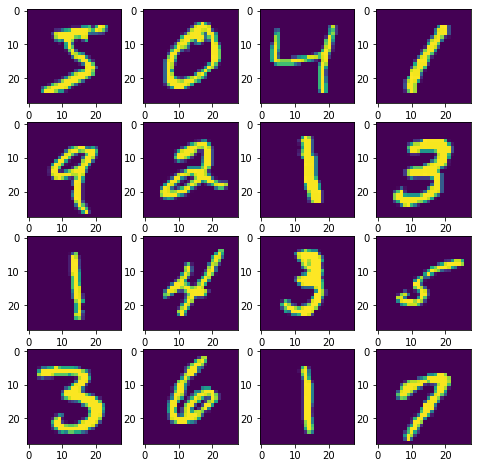

In [6]:
fig = plt.figure(figsize = (8,8))
for i in range(16):
    ax = fig.add_subplot(4,4,i+1)
    ax.imshow(x_train[i])
plt.show()

In [7]:
x_train = x_train.reshape(60000, 28, 28,1)
x_test =  x_test.reshape(10000, 28, 28,1)

In [8]:
x_train.shape,x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [9]:
#one hot encoding in keras
from keras.utils import to_categorical


y_train = to_categorical(y_train)
y_test =to_categorical(y_test)

In [10]:
y_test.shape,y_train.shape

((10000, 10), (60000, 10))

### Building model and adding layers


In [11]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Activation, Conv2D, MaxPooling2D, Dropout

In [49]:
def CreateModel(inshape,nclasses):
    model = Sequential()
    model.add(Conv2D(16,(2,2),input_shape = (inshape),activation='relu',padding = 'same'))
    model.add(MaxPooling2D(pool_size=(2, 2),padding= "same"))
    model.add(Conv2D(32,(2,2),activation='relu',padding = 'same'))
    model.add(MaxPooling2D(pool_size=(2, 2),padding= "same"))
    
    model.add(Flatten())
    
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(rate = 0.25))
    
    model.add(Dense((nclasses),activation='softmax'))
    
    return model
 

In [50]:
model = CreateModel((28, 28, 1),10)

In [51]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 28, 28, 16)        80        
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 14, 14, 32)        2080      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 1568)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 1024)              1606656   
_________________________________________________________________
dropout_10 (Dropout)         (None, 1024)            

###  fitting the model

In [52]:
import time

In [53]:
batch_size = 100
epochs = 15
start=time.time()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train,y_train, batch_size=batch_size, epochs=epochs,validation_data=(x_test,y_test))
model.evaluate(x_train,y_train)
end = time.time() - start

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 49s 810us/step - loss: 9.8598 - acc: 0.3847 - val_loss: 9.6280 - val_acc: 0.4011
Epoch 2/15
60000/60000 [==============================] - 45s 743us/step - loss: 2.5034 - acc: 0.8163 - val_loss: 0.0655 - val_acc: 0.9779
Epoch 3/15
60000/60000 [==============================] - 39s 644us/step - loss: 0.0544 - acc: 0.9828 - val_loss: 0.0475 - val_acc: 0.9846
Epoch 4/15
60000/60000 [==============================] - 45s 750us/step - loss: 0.0321 - acc: 0.9893 - val_loss: 0.0476 - val_acc: 0.9855
Epoch 5/15
60000/60000 [==============================] - 45s 747us/step - loss: 0.0245 - acc: 0.9921 - val_loss: 0.0632 - val_acc: 0.9843
Epoch 6/15
60000/60000 [==============================] - 47s 784us/step - loss: 0.0219 - acc: 0.9926 - val_loss: 0.0538 - val_acc: 0.9861
Epoch 7/15
60000/60000 [==============================] - 49s 812us/step - loss: 0.0213 - acc: 0.9928 - val_loss: 0.

In [54]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 2s 170us/step


[0.07341761165981016, 0.9865]

In [83]:
ypred = model.predict(x_test)

In [85]:
ypred.shape

(10000, 10)

In [86]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [87]:
import numpy as np
y_test1 = (np.argmax(y_test,axis =1))

In [92]:
ypred1 = (np.argmax(ypred,axis =1))

In [93]:
y_test1.shape

(10000,)

In [95]:
ypred1.shape

(10000,)

In [96]:
from sklearn.metrics import classification_report, confusion_matrix


In [98]:
confusion_matrix(y_test1,ypred1)

array([[ 975,    0,    2,    0,    0,    0,    2,    1,    0,    0],
       [   0, 1123,    1,    0,    0,    3,    4,    1,    3,    0],
       [   2,    1, 1020,    0,    0,    0,    0,    8,    1,    0],
       [   0,    0,    0, 1000,    0,    7,    0,    1,    2,    0],
       [   0,    2,    1,    0,  971,    0,    2,    0,    1,    5],
       [   1,    1,    0,    5,    0,  878,    2,    1,    2,    2],
       [   4,    2,    0,    0,    2,    2,  944,    0,    4,    0],
       [   0,    2,    6,    1,    1,    0,    0, 1015,    1,    2],
       [   1,    0,    5,    3,    1,    1,    1,    1,  957,    4],
       [   0,    1,    0,    1,    9,    6,    1,    4,    5,  982]],
      dtype=int64)

In [100]:
print(classification_report(y_test1,ypred1))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [102]:
...
# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


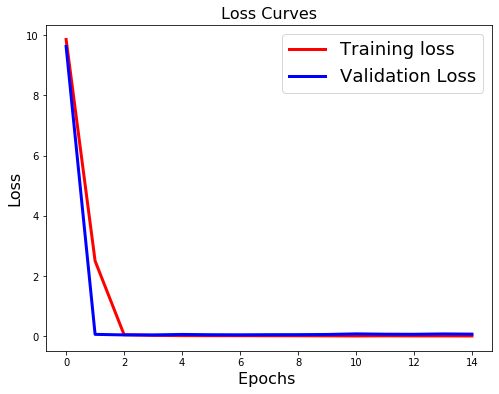

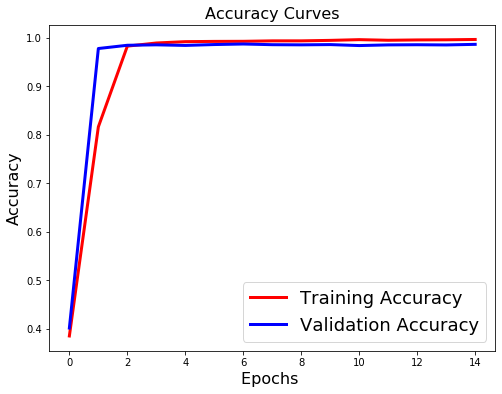

In [101]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)

plt.title('Accuracy Curves',fontsize=16)
plt.show()